# 2021101062
# Siya Puttagunta
# Assignment 3

#### Imports

In [15]:
import os
import yt_dlp
import ffmpeg
import cv2
import time
import pandas as pd
import shutil
import random
import torch
import numpy as np
from ultralytics import YOLO
import shutil
import matplotlib.pyplot as plt

# 1

### 1.1

In [15]:
def download_video(url, output_path):
    ydl_opts = {
        'format': 'bestvideo[ext=mp4][height<=480]+bestaudio[ext=m4a]/best[ext=mp4][height<=480]/best',
        'outtmpl': output_path,
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

def get_video_info(input_video):
    probe = ffmpeg.probe(input_video)
    video_info = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')
    return video_info

def extract_frames(input_video, output_dir, frame_rate, start_time=0, duration=30):
    output_pattern = os.path.join(output_dir, 'frame_%04d.jpg')
    ffmpeg.input(input_video, ss=start_time, t=duration).output(output_pattern, vf=f'fps={frame_rate}').run()

In [16]:
video_url = 'https://www.youtube.com/watch?v=bSMxl1V8FSg'
output_dir = 'output_frames'

if os.path.exists(output_dir):  
    shutil.rmtree(output_dir)
    
os.makedirs(output_dir, exist_ok=True)

video_file = 'video.mp4'
download_video(video_url, video_file)

video_info = get_video_info(video_file)
frame_rate = eval(video_info['r_frame_rate'])
print(f"Frame rate: {frame_rate} fps\n")

extract_frames(video_file, output_dir, frame_rate)

[youtube] Extracting URL: https://www.youtube.com/watch?v=bSMxl1V8FSg
[youtube] bSMxl1V8FSg: Downloading webpage
[youtube] bSMxl1V8FSg: Downloading ios player API JSON
[youtube] bSMxl1V8FSg: Downloading android player API JSON


[youtube] bSMxl1V8FSg: Downloading player 45986ce4
[youtube] bSMxl1V8FSg: Downloading m3u8 information
[info] bSMxl1V8FSg: Downloading 1 format(s): 606+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 29
[download] Destination: video.f606.mp4
[download] 100% of    9.92MiB in 00:00:06 at 1.44MiB/s                  
[download] Destination: video.f140.m4a
[download] 100% of    2.19MiB in 00:00:00 at 2.69MiB/s   
[Merger] Merging formats into "video.mp4"
Deleting original file video.f606.mp4 (pass -k to keep)
Deleting original file video.f140.m4a (pass -k to keep)
Frame rate: 23.976023976023978 fps



ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

### 1.2

In [16]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

frames_dir = 'output_frames'
frame_files = [f for f in os.listdir(frames_dir) if os.path.isfile(os.path.join(frames_dir, f))]

output_faces_dir = 'frames_with_faces_detected'
os.makedirs(output_faces_dir, exist_ok=True)

for frame_file in frame_files:
    frame_path = os.path.join(frames_dir, frame_file)
    frame = cv2.imread(frame_path) 

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 

    output_frame_path = os.path.join(output_faces_dir, frame_file)
    cv2.imwrite(output_frame_path, frame)  

cv2.destroyAllWindows()

In [26]:
frame = cv2.imread('output_frames/frame_0002.jpg')
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

print("Default xml file:")
start_time = time.time()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=50, minSize=(30, 30))
end_time = time.time()
print(f"Time taken to detect faces using scale factore = 1.1 and min neighbours = 50: {end_time - start_time:.2f} seconds")

start_time = time.time()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
end_time = time.time()
print(f"Time taken to detect faces using scale factore = 1.1 and min neighbours = 5: {end_time - start_time:.2f} seconds")

start_time = time.time()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30))
end_time = time.time()
print(f"Time taken to detect faces using scale factore = 1.2 and min neighbours = 5: {end_time - start_time:.2f} seconds\n")

print("Alt xml file:")
start_time = time.time()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=50, minSize=(30, 30))
end_time = time.time()
print(f"Time taken to detect faces using scale factore = 1.1 and min neighbours = 50: {end_time - start_time:.2f} seconds")

Default xml file:
Time taken to detect faces using scale factore = 1.1 and min neighbours = 50: 0.18 seconds
Time taken to detect faces using scale factore = 1.1 and min neighbours = 5: 0.17 seconds
Time taken to detect faces using scale factore = 1.2 and min neighbours = 5: 0.10 seconds

Alt xml file:
Time taken to detect faces using scale factore = 1.1 and min neighbours = 50: 0.17 seconds


- Neighbours are required to detect a face. More the number of neighbours, more the time it takes, although here there is no such huge difference. 
- When the scaleFactor is set to a smaller value (1.1 or lower), the object detector performs more detailed scanning of the image at smaller scales. This can improve the detection of smaller objects or objects at varying distances but increases processing time. Conversely, when the scaleFactor is set to a larger value (1.2 or higher), the detector scans the image more quickly but may miss smaller objects or objects that are far away.
- Using the **haarcascade_frontalface_alt.xml** file makes detection of faces work much faster than **haarcascade_frontalface_default.xml**. The latter detects a lot of faces (which are actually not faces) i.e. false positives. So, it takes more time to process images than the former one.

### 1.3

In [17]:
def convert_list_to_video(image_folder, output_video_path, frame_rate=24):
    images_list = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
    images_list.sort()

    image_path = os.path.join(image_folder, images_list[0])
    frame = cv2.imread(image_path)
    height, width, layers = frame.shape

    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*"mp4v"), frame_rate, (width, height))

    for image in images_list:
        image_path = os.path.join(image_folder, image)
        frame = cv2.imread(image_path)
        video_writer.write(frame)

    video_writer.release()

input_list_folder = "frames_with_faces_detected"
output_video_path = "faces_detected.mp4"

convert_list_to_video(input_list_folder, output_video_path)

### Link to Video:
https://drive.google.com/file/d/1aRf_5nV0pw2Zyi0ZERWHdfLQW7ZluxhJ/view?usp=sharing

- Clear, well-lit and frontal faces lead to accurate detections because Haar cascades works only for frontal faces.
- Minimal occlusions and distinct facial features enhance detection whereas low resolution or blurry frames hinder detection accuracy.
- Complex backgrounds can cause missed detections. Background complexity and motion blur affect detection reliability.

### 1.4

In [21]:
def iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[0] + box1[2], box2[0] + box2[2])
    y2 = min(box1[1] + box1[3], box2[1] + box2[3])
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box1_area = (box1[2] + 1) * (box1[3] + 1)
    box2_area = (box2[2] + 1) * (box2[3] + 1)
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

def get_face_boxes(frame, face_cascade):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

def track_faces(frames_dir, face_cascade):
    frame_files = sorted([f for f in os.listdir(frames_dir) if os.path.isfile(os.path.join(frames_dir, f))])
    face_tracks = {}
    track_id = 0
    prev_tracks = []
    new_tracks = []

    for i in range(len(frame_files)):
        frame_path = os.path.join(frames_dir, frame_files[i])
        frame = cv2.imread(frame_path)
        faces = get_face_boxes(frame, face_cascade)

        for face in faces:
            matched_track_id = None

            for prev_face in prev_tracks:
                if iou(face, prev_face[-1]) > 0.5:
                    matched_track_id = prev_face[0]
                    face_tracks[matched_track_id].append(face)
                    new_tracks.append([matched_track_id, face])
                    break

            if matched_track_id is None:
                face_tracks[track_id] = [face]
                new_tracks.append([track_id, face])
                track_id += 1

        prev_tracks = new_tracks.copy()
        new_tracks = []

        visualize_tracks(frame, prev_tracks, 'output_frames_with_tracks/' + frame_files[i])        
    return face_tracks

def visualize_tracks(frame, frame_track_ids_list, frame_path):
    for track_info in frame_track_ids_list:
        track_id = track_info[0]
        x, y, w, h = track_info[1]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, str(track_id), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imwrite(frame_path, frame)

output_frames_dir = 'output_frames_with_tracks'
os.makedirs(output_frames_dir, exist_ok=True)
frames_dir = 'output_frames'

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
face_tracks = track_faces(frames_dir, face_cascade)
print(f"Number of unique tracks: {len(face_tracks)}")

Number of unique tracks: 38


In [22]:
input_list_folder = "output_frames_with_tracks"
output_video_path = "output_frames_with_tracks.mp4"

convert_list_to_video(input_list_folder, output_video_path)

### Link to Video:
https://drive.google.com/file/d/15pJcfE04AovEWsZHk0FgTDseiyBlxWwq/view?usp=sharing

- Different people usually get associated in one track. A track is mapped to only one face. 
- If the face detected in previous frame is not detected in current frame then the track ends. And if it is detected in the next frame without being detected in the current frame then a new track starts. So, in this case, the track id gets incremented by 1 for the same face meaning that a unique character is not associated with one unique track id. A unique character may have multiple track ids but the vice-versa is not true.
- Occlusions and overlapping of faces can be issue in association-based tracking.

### Timestamps of failure cases:
- **0:03**: There is a small detection near the collar of the boy's shirt which is actually not a face. And this is being detected again after 1-2 frames incrementing the track id from 4 to 7. So, later when the boy's face is observed it can be seen that his track id immediately changes from 4 to 7 which is an issue. This can create an illusion that the face is different from the one observed in the previous frame even though both are same.
- **0:10**: Face of the second boy is not detected in one frame due to which his track id gets incremented by 1 in the next frame creating the same problem that was mentioned above.
- **0:21 - 0:22**: Face of the 3rd boy is not detected at all which doesn't help in keeping a view on his track.
- **0:27**: A bush is being detected as a face due to which track ids get altered. 

# 2

### 2.2

YOLO (You Only Look Once) is a **single-shot** object detection algorithm, which means it performs object detection in a single forward pass through the neural network. This is in contrast to the R-CNN series which is a two-stage object detection algorithm. In the R-CNN series, the first stage is to generate regions of interest (RoIs) which are potential object locations and the second stage is to classify these proposals. It is used for real-time object detection in images and videos.

## Key Differences:

- As mentioned, YOLO is a single-shot detector while the R-CNN series is a two-stage detector. This makes YOLO much faster, as it only needs to pass the image through the network once compared to the R-CNN series which requires multiple passes.

- YOLO is trained end-to-end, meaning the entire model is trained as a single unit, while the R-CNN series requires separate training steps for the region proposal network and the classification/regression network.

- YOLO takes a more holistic approach to object detection, considering the entire image at once, rather than focusing on individual regions like the R-CNN series. This allows YOLO to work faster than R-CNN.

## Different versions of YOLO:

### YOLOv1:
The original YOLO model was a groundbreaking approach to object detection. It was faster than the R-CNN series at the time, and it introduced the concept of a single-shot, end-to-end object detector.

### YOLOv4:
YOLOv4 introduced several key improvements:
- Stronger backbone network (CSPDarknet53)
- Improved feature pyramid network (PAN)
- Mosaic data augmentation technique
- CIoU loss function for better bounding box regression
- Additionally, YOLOv4 employs what are referred to as "bag of freebies," or strategies that raise model accuracy during training without raising inference costs. A popular "bag of freebies" method for object detection is data augmentation, which boosts the input images' variability to strengthen the model's resilience.
- Overall, YOLOv4 achieved state-of-the-art performance on several object detection benchmarks, while maintaining real-time inference speeds.

### YOLOv9:
- With the introduction of methods like the Generalised Efficient Layer Aggregation Network (GELAN) and Programmable Gradient Information (PGI), YOLOv9 represents a substantial breakthrough in real-time object recognition. 
- YOLOv9 primarily focuses on resolving the issues raised by information loss in deep neural networks. At the core of YOLOv9's design are the Information Bottleneck Principle and the creative application of Reversible Functions which ensure the system's excellent accuracy and efficiency.

### 2.3

In [32]:
print("YOLOv8n:")
model = YOLO( "yolov8n.pt")
num_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters in YOLOv8n model: {num_params}")
num_conv_layers = len([m for m in model.modules() if isinstance(m, torch.nn.Conv2d)])
print(f"Total convolutional layers in YOLOv8n model: {num_conv_layers}\n")


print("YOLOv8m:")
model = YOLO( "yolov8m.pt")
num_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters in YOLOv8m model: {num_params}")
num_conv_layers = len([m for m in model.modules() if isinstance(m, torch.nn.Conv2d)])
print(f"Total convolutional layers in YOLOv8m model: {num_conv_layers}")

YOLOv8n:
Total parameters in YOLOv8n model: 3157200
Total convolutional layers in YOLOv8n model: 64

YOLOv8m:
Total parameters in YOLOv8m model: 25902640
Total convolutional layers in YOLOv8m model: 84


### 2.4

#### 2.4.1

In [8]:
dataset_dir = "2/Data"
train1_dir = "2/Train1"

os.makedirs(train1_dir, exist_ok=True)

train1_images_dir = os.path.join(train1_dir, "images/train")
train1_labels_dir = os.path.join(train1_dir, "labels/train")
os.makedirs(train1_images_dir, exist_ok=True)
os.makedirs(train1_labels_dir, exist_ok=True)

all_images = os.listdir(os.path.join(dataset_dir, "images/train"))
selected_images = random.sample(all_images, 100)

for img_name in selected_images:
    img_path_src = os.path.join(dataset_dir, "images/train", img_name)
    img_path_dest = os.path.join(train1_images_dir, img_name)
    shutil.copy(img_path_src, img_path_dest)
    
    ann_name = img_name.replace(".png", ".txt")
    ann_path_src = os.path.join(dataset_dir, "labels/train", ann_name)
    ann_path_dest = os.path.join(train1_labels_dir, ann_name)
    shutil.copy(ann_path_src, ann_path_dest)

print("train1 dataset created with images and labels folders.")

train1 dataset created with images and labels folders.


#### 2.4.2

In [10]:
yolov8n_scratch100 = YOLO("yolov8n.yaml")
results = yolov8n_scratch100.train(data="2/Train1/config.yaml", project="Train1", name="yolov8n_scratch", epochs=20, pretrained=False)

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Train1, name=yolov8n_scratch, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to Train1/yolov8n_scratch/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Train1/yolov8n_scratch
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      3.347      4.323      4.275          8        640: 100%|██████████| 7/7 [00:22<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]

                   all         50         52    0.00235      0.635     0.0102    0.00281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      3.315      4.326       4.23          9        640: 100%|██████████| 7/7 [00:20<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]

                   all         50         52    0.00226      0.615     0.0117    0.00321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      3.401      4.313      4.217          5        640: 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]

                   all         50         52    0.00231      0.615     0.0062    0.00223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      3.259      4.275      4.185          7        640: 100%|██████████| 7/7 [00:19<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52    0.00226      0.615    0.00471    0.00157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G      3.361      4.139      4.173          9        640: 100%|██████████| 7/7 [00:19<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]

                   all         50         52    0.00223      0.615    0.00505    0.00162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G       3.29      4.203      4.111          5        640: 100%|██████████| 7/7 [00:21<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all         50         52     0.0022      0.615    0.00787    0.00294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G      3.245      4.199      4.036         11        640: 100%|██████████| 7/7 [00:19<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.19s/it]

                   all         50         52    0.00228      0.635    0.00546     0.0017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      3.114      3.959      4.002          9        640: 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]

                   all         50         52    0.00222      0.615    0.00505    0.00158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G      3.204      4.056       3.94          7        640: 100%|██████████| 7/7 [00:22<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]

                   all         50         52    0.00212      0.596    0.00464    0.00152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G      3.167      3.946      3.908          8        640: 100%|██████████| 7/7 [00:21<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all         50         52    0.00214      0.596     0.0052    0.00161
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G      2.949      4.447      3.865          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all         50         52     0.0023      0.635    0.00652    0.00193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      3.073      4.526      3.775          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all         50         52    0.00234      0.596    0.00644     0.0019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      2.864      4.493      3.721          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all         50         52    0.00251      0.596    0.00753    0.00212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G      2.903      4.327      3.662          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all         50         52    0.00232      0.596    0.00718    0.00211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G      2.718      4.356       3.66          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         50         52     0.0026      0.538     0.0065    0.00206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G       2.72      4.348      3.613          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]

                   all         50         52    0.00404      0.558     0.0104    0.00323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G      2.751      4.318      3.588          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all         50         52    0.00394      0.558    0.00879    0.00294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G      2.852      4.353      3.539          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]

                   all         50         52    0.00402      0.615     0.0144    0.00389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      2.681       4.24      3.535          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all         50         52    0.00369      0.635     0.0148    0.00356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G      2.659      4.191      3.453          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all         50         52     0.0027      0.692     0.0148    0.00367

20 epochs completed in 0.141 hours.


Optimizer stripped from Train1/yolov8n_scratch/weights/last.pt, 6.2MB
Optimizer stripped from Train1/yolov8n_scratch/weights/best.pt, 6.2MB

Validating Train1/yolov8n_scratch/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]


                   all         50         52    0.00403      0.615     0.0144     0.0039
Speed: 1.2ms preprocess, 53.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to Train1/yolov8n_scratch


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),▅▆▂▁▁▃▂▁▁▁▂▂▃▃▂▅▄███
metrics/mAP50-95(B),▅▆▃▁▁▅▂▁▁▁▂▂▃▃▃▆▅█▇█
metrics/precision(B),▂▂▂▂▁▁▂▁▁▁▂▂▂▂▃███▇█
metrics/recall(B),█▇▇▇▇▇█▇▅▅█▅▅▅▁▂▂▇█▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▇█▇█▇▇▅▆▆▄▅▃▃▂▂▂▃▁▁


In [9]:
yolov8n_pretrained100 = YOLO("yolov8n.pt")
results = yolov8n_pretrained100.train(data="2/Train1/config.yaml", project="Train1", name="yolov8n_pretrained", epochs=20, pretrained=True)

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Train1, name=yolov8n_pretrained, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to Train1/yolov8n_pretrained/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Train1/yolov8n_pretrained
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.9411      2.968      1.152          8        640: 100%|██████████| 7/7 [00:24<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]

                   all         50         52     0.0034      0.981       0.53      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.046      2.485      1.186          9        640: 100%|██████████| 7/7 [00:21<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]

                   all         50         52     0.0034      0.981      0.416      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/20         0G      1.062      2.267      1.202          5        640: 100%|██████████| 7/7 [00:22<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.30s/it]

                   all         50         52     0.0034      0.981      0.467      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G     0.9572      2.317      1.105          7        640: 100%|██████████| 7/7 [00:20<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all         50         52     0.0034      0.981      0.452      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.9667      2.009      1.087          9        640: 100%|██████████| 7/7 [00:19<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]

                   all         50         52      0.897      0.135      0.666      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.9447      1.893      1.114          5        640: 100%|██████████| 7/7 [00:20<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]

                   all         50         52      0.758      0.301      0.595      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.9232      1.834      1.074         11        640: 100%|██████████| 7/7 [00:20<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]

                   all         50         52      0.796       0.15      0.557      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/20         0G     0.8989      1.865       1.11          9        640: 100%|██████████| 7/7 [00:19<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.22s/it]

                   all         50         52      0.837      0.269      0.524      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G     0.9332      1.842      1.112          7        640: 100%|██████████| 7/7 [00:22<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all         50         52      0.438      0.308      0.377      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G     0.9163      1.856      1.131          8        640: 100%|██████████| 7/7 [00:19<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]

                   all         50         52      0.692       0.13      0.397      0.171
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G     0.9773      2.387      1.213          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all         50         52      0.646      0.135       0.35      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.9257      2.412      1.151          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all         50         52      0.617      0.365      0.446      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G      0.912      2.338       1.14          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  2.00s/it]

                   all         50         52      0.541      0.365       0.41      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G     0.8814      2.027      1.136          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52       0.65        0.5      0.467      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.8682      2.045      1.133          4        640: 100%|██████████| 7/7 [00:22<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]

                   all         50         52      0.627      0.549      0.509      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G     0.8851      1.997      1.116          4        640: 100%|██████████| 7/7 [00:26<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.43s/it]

                   all         50         52      0.685      0.481      0.532      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.7828      2.091      1.078          4        640: 100%|██████████| 7/7 [00:23<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]

                   all         50         52      0.569      0.558      0.553      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G     0.8229      2.025      1.053          4        640: 100%|██████████| 7/7 [00:23<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]

                   all         50         52      0.607      0.623      0.558      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.8163      1.949      1.087          4        640: 100%|██████████| 7/7 [00:22<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  2.00s/it]

                   all         50         52      0.541      0.615      0.552      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G     0.7329      1.769      1.017          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]

                   all         50         52      0.586      0.635      0.574      0.383

20 epochs completed in 0.144 hours.


Optimizer stripped from Train1/yolov8n_pretrained/weights/last.pt, 6.2MB
Optimizer stripped from Train1/yolov8n_pretrained/weights/best.pt, 6.2MB

Validating Train1/yolov8n_pretrained/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]


                   all         50         52       0.76      0.305      0.596      0.409
Speed: 1.0ms preprocess, 64.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to Train1/yolov8n_pretrained


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),▅▂▄▃█▆▆▅▂▂▁▃▂▄▅▅▆▆▅▆
metrics/mAP50-95(B),█▄▆▅██▆▅▃▂▁▄▃▃▄▅▆█▇█
metrics/precision(B),▁▁▁▁█▇▇█▄▆▆▆▅▆▆▆▅▆▅▇
metrics/recall(B),████▁▂▁▂▂▁▁▃▃▄▄▄▅▅▅▂
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅██▆▆▆▅▅▅▅▆▅▅▄▄▄▂▃▃▁


In [8]:
yolov8m_pretrained100 = YOLO("yolov8m.pt")
results = yolov8m_pretrained100.train(data="2/Train1/config.yaml", project="Train1", name="yolov8m_pretrained", epochs=20, pretrained=True)

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Train1, name=yolov8m_pretrained, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to Train1/yolov8m_pretrained/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Train1/yolov8m_pretrained
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.8077      2.432      1.181          8        640: 100%|██████████| 7/7 [02:22<00:00, 20.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.45s/it]

                   all         50         52      0.624      0.365      0.452      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.8482      1.955      1.114          9        640: 100%|██████████| 7/7 [02:09<00:00, 18.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.40s/it]

                   all         50         52      0.323      0.423      0.224      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.8913      1.842      1.134          5        640: 100%|██████████| 7/7 [02:07<00:00, 18.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.71s/it]

                   all         50         52      0.454      0.442      0.373      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.059      1.819       1.26          7        640: 100%|██████████| 7/7 [02:09<00:00, 18.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.21s/it]

                   all         50         52      0.552      0.538      0.452      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.012      1.784      1.194          9        640: 100%|██████████| 7/7 [02:08<00:00, 18.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.03s/it]

                   all         50         52      0.233      0.385       0.16     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.107       1.83      1.297          5        640: 100%|██████████| 7/7 [02:10<00:00, 18.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.40s/it]

                   all         50         52      0.126      0.365     0.0877     0.0242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.074      1.703      1.278         11        640: 100%|██████████| 7/7 [02:09<00:00, 18.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.72s/it]

                   all         50         52     0.0705      0.212      0.046     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.9696      1.477      1.213          9        640: 100%|██████████| 7/7 [02:04<00:00, 17.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all         50         52     0.0175      0.519     0.0142    0.00543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.023       1.78      1.256          7        640: 100%|██████████| 7/7 [02:06<00:00, 18.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.49s/it]

                   all         50         52     0.0923      0.673      0.186     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.032      1.597      1.247          8        640: 100%|██████████| 7/7 [02:07<00:00, 18.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.99s/it]

                   all         50         52      0.108      0.538       0.18     0.0735


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.137      1.902      1.461          4        640: 100%|██████████| 7/7 [02:05<00:00, 17.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.21s/it]

                   all         50         52      0.116      0.442      0.146     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.394      2.065      1.646          4        640: 100%|██████████| 7/7 [02:18<00:00, 19.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.18s/it]

                   all         50         52      0.122      0.346     0.0716     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.159      1.869      1.431          4        640: 100%|██████████| 7/7 [02:12<00:00, 18.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.47s/it]

                   all         50         52        0.4     0.0769      0.184     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.162      1.873      1.426          4        640: 100%|██████████| 7/7 [02:08<00:00, 18.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.09s/it]

                   all         50         52      0.127      0.731      0.284     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.096      1.675       1.38          4        640: 100%|██████████| 7/7 [02:07<00:00, 18.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.74s/it]

                   all         50         52     0.0496      0.635       0.19     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.159      1.658      1.406          4        640: 100%|██████████| 7/7 [02:05<00:00, 17.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.53s/it]

                   all         50         52      0.202      0.635      0.228      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.041      1.675      1.365          4        640: 100%|██████████| 7/7 [02:04<00:00, 17.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.11s/it]

                   all         50         52      0.234      0.519       0.29      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.086       1.47      1.317          4        640: 100%|██████████| 7/7 [02:04<00:00, 17.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.80s/it]

                   all         50         52      0.271      0.586      0.382      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.004      1.349      1.324          4        640: 100%|██████████| 7/7 [02:04<00:00, 17.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.54s/it]

                   all         50         52      0.468      0.481      0.478      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.8659      1.335      1.219          4        640: 100%|██████████| 7/7 [02:05<00:00, 17.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.73s/it]

                   all         50         52      0.647        0.5      0.519      0.309



20 epochs completed in 0.834 hours.
Optimizer stripped from Train1/yolov8m_pretrained/weights/last.pt, 52.0MB
Optimizer stripped from Train1/yolov8m_pretrained/weights/best.pt, 52.0MB

Validating Train1/yolov8m_pretrained/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.32s/it]


                   all         50         52      0.625      0.365      0.454      0.378
Speed: 1.0ms preprocess, 314.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to Train1/yolov8m_pretrained


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),█▄▆█▃▂▁▁▄▃▃▂▄▅▄▄▅▇██
metrics/mAP50-95(B),█▄▄▅▂▁▁▁▂▂▂▁▃▃▂▃▄▅▆█
metrics/precision(B),█▅▆▇▃▂▂▁▂▂▂▂▅▂▁▃▃▄▆█
metrics/recall(B),▄▅▅▆▄▄▂▆▇▆▅▄▁█▇▇▆▆▅▄
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▁▁▂▄▃▅▄▃▄▄▅█▅▅▄▅▄▄▃▂


In [5]:
yolov8n_scratch400 = YOLO("yolov8n.yaml")
results = yolov8n_scratch400.train(data="2/Train2/config.yaml", project="Train2", name="yolov8n_scratch", epochs=20, pretrained=False)

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=2/Train2/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Train2, name=yolov8n_scratch, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to Train2/yolov8n_scratch/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Train2/yolov8n_scratch
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      3.418      4.227      4.246         31        640: 100%|██████████| 25/25 [01:28<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all         50         52    0.00229      0.615    0.00519     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      3.298      4.161      4.097         36        640: 100%|██████████| 25/25 [01:23<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all         50         52     0.0022      0.615    0.00616    0.00222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      3.129       3.94      3.858         39        640: 100%|██████████| 25/25 [01:20<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all         50         52    0.00607        0.5     0.0085    0.00276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      3.133      3.831      3.661         33        640: 100%|██████████| 25/25 [01:20<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all         50         52    0.00678        0.5     0.0115    0.00297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G       2.99      3.729      3.465         27        640: 100%|██████████| 25/25 [01:20<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.81s/it]

                   all         50         52    0.00283      0.788    0.00554    0.00146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G      2.921      3.648      3.333         39        640: 100%|██████████| 25/25 [01:19<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all         50         52     0.0141     0.0192    0.00916    0.00239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G      2.908      3.545      3.241         37        640: 100%|██████████| 25/25 [01:20<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52      0.198     0.0192     0.0153    0.00409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      2.816      3.513      3.173         39        640: 100%|██████████| 25/25 [01:21<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all         50         52      0.122     0.0192     0.0162    0.00408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      2.761      3.365      3.065         31        640: 100%|██████████| 25/25 [01:21<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all         50         52      0.272     0.0192     0.0302    0.00729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      2.654      3.266      3.038         38        640: 100%|██████████| 25/25 [01:22<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.78s/it]

                   all         50         52     0.0166      0.212     0.0129    0.00408
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G      2.525      3.469      2.973         16        640: 100%|██████████| 25/25 [01:20<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all         50         52     0.0156      0.173     0.0147    0.00555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/20         0G      2.499      3.338      2.914         16        640: 100%|██████████| 25/25 [01:19<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

                   all         50         52       0.14      0.385       0.11     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      2.483      3.235      2.861         16        640: 100%|██████████| 25/25 [01:21<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all         50         52      0.137      0.442      0.177     0.0629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G      2.411      3.167      2.842         16        640: 100%|██████████| 25/25 [01:20<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all         50         52      0.151       0.25      0.126     0.0417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G      2.389       3.11      2.845         18        640: 100%|██████████| 25/25 [01:20<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all         50         52      0.258      0.212      0.169     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      2.346      3.044      2.799         17        640: 100%|██████████| 25/25 [01:18<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all         50         52      0.166      0.269      0.162     0.0542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G        2.3      2.998      2.744         16        640: 100%|██████████| 25/25 [01:22<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all         50         52      0.294      0.346      0.231      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      2.299      2.971      2.686         18        640: 100%|██████████| 25/25 [01:20<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all         50         52      0.239      0.346      0.215       0.07

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G      2.229      2.964      2.683         18        640: 100%|██████████| 25/25 [01:21<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all         50         52      0.239      0.288      0.168     0.0655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G      2.239      2.884      2.696         16        640: 100%|██████████| 25/25 [01:20<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all         50         52      0.168      0.308      0.158     0.0718

20 epochs completed in 0.473 hours.


Optimizer stripped from Train2/yolov8n_scratch/weights/last.pt, 6.2MB
Optimizer stripped from Train2/yolov8n_scratch/weights/best.pt, 6.2MB

Validating Train2/yolov8n_scratch/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


                   all         50         52      0.294      0.346       0.23     0.0838
Speed: 1.0ms preprocess, 48.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to Train2/yolov8n_scratch


lr/pg0,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
lr/pg1,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
lr/pg2,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▁▁▁▁▁▁▁▁▂▁▁▄▆▅▆▆██▆█
metrics/mAP50-95(B),▁▁▁▁▁▁▁▁▁▁▁▄▆▄▅▅█▇▆█
metrics/precision(B),▁▁▁▁▁▁▆▄▇▁▁▄▄▅▇▅█▇▇█
metrics/recall(B),▆▆▅▅█▁▁▁▁▃▂▄▅▃▃▃▄▄▃▄
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▆▅▅▅▄▄▃▃▃▂▂▂▂▁▁▁▁


In [6]:
yolov8n_pretrained400 = YOLO("yolov8n.pt")
results = yolov8n_pretrained400.train(data="2/Train2/config.yaml", project="Train2", name="yolov8n_pretrained", epochs=20, pretrained=True)

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=2/Train2/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Train2, name=yolov8n_pretrained, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to Train2/yolov8n_pretrained/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Train2/yolov8n_pretrained
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.025      2.482       1.18         31        640: 100%|██████████| 25/25 [01:22<00:00,  3.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all         50         52     0.0034      0.981      0.457      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.048      2.244       1.19         36        640: 100%|██████████| 25/25 [01:22<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all         50         52      0.587      0.301       0.45       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/20         0G      1.187      2.182      1.277         39        640: 100%|██████████| 25/25 [01:22<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all         50         52       0.34      0.423      0.281      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      1.233      2.176      1.296         33        640: 100%|██████████| 25/25 [01:21<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all         50         52      0.302      0.327      0.314      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G      1.285      2.115      1.348         27        640: 100%|██████████| 25/25 [01:21<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all         50         52      0.412      0.485      0.419      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G      1.263      1.994      1.341         39        640: 100%|██████████| 25/25 [01:19<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all         50         52      0.437      0.615      0.466      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.265      2.027      1.376         37        640: 100%|██████████| 25/25 [01:19<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all         50         52      0.339      0.327      0.225      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.227      1.881      1.312         39        640: 100%|██████████| 25/25 [01:19<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all         50         52      0.486      0.601      0.502       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G      1.163      1.786      1.274         31        640: 100%|██████████| 25/25 [01:20<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all         50         52      0.496      0.577       0.55      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.159      1.726      1.253         38        640: 100%|██████████| 25/25 [01:20<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all         50         52      0.613      0.578       0.64      0.414


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.186      2.012      1.334         16        640: 100%|██████████| 25/25 [01:18<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all         50         52      0.724        0.5      0.509      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/20         0G       1.16      1.855       1.35         16        640: 100%|██████████| 25/25 [01:20<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.95s/it]

                   all         50         52      0.748       0.57      0.624      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G        1.1      1.754      1.308         16        640: 100%|██████████| 25/25 [01:20<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]

                   all         50         52      0.573      0.615       0.59      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G      1.029      1.682      1.262         16        640: 100%|██████████| 25/25 [01:17<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all         50         52      0.609      0.673      0.633      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G       1.03      1.557      1.257         18        640: 100%|██████████| 25/25 [01:17<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all         50         52      0.718      0.654      0.703      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.9772      1.451      1.214         17        640: 100%|██████████| 25/25 [01:18<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all         50         52      0.664      0.692      0.668      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.9333      1.441      1.177         16        640: 100%|██████████| 25/25 [01:17<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all         50         52      0.709      0.673      0.719      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.8893      1.356      1.103         18        640: 100%|██████████| 25/25 [01:17<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all         50         52      0.678      0.654      0.694      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G     0.8373      1.253      1.104         18        640: 100%|██████████| 25/25 [01:18<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all         50         52        0.7      0.788      0.732      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.7986      1.237      1.096         16        640: 100%|██████████| 25/25 [01:18<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all         50         52      0.691      0.774       0.76      0.574



20 epochs completed in 0.465 hours.
Optimizer stripped from Train2/yolov8n_pretrained/weights/last.pt, 6.2MB
Optimizer stripped from Train2/yolov8n_pretrained/weights/best.pt, 6.2MB

Validating Train2/yolov8n_pretrained/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]


                   all         50         52      0.691      0.774       0.76      0.574
Speed: 1.1ms preprocess, 53.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to Train2/yolov8n_pretrained


lr/pg0,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
lr/pg1,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
lr/pg2,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▄▄▂▂▄▄▁▅▅▆▅▆▆▆▇▇▇▇██
metrics/mAP50-95(B),▄▃▁▂▃▄▁▃▅▆▃▆▅▆▇▆█▇██
metrics/precision(B),▁▆▄▄▅▅▄▆▆▇██▆▇█▇█▇█▇
metrics/recall(B),█▁▂▁▃▄▁▄▄▄▃▄▄▅▅▅▅▅▆▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▄▅▇▇███▇▆▆▇▆▅▄▄▄▃▂▂▁


In [7]:
yolov8m_pretrained400 = YOLO("yolov8m.pt")
results = yolov8m_pretrained400.train(data="2/Train2/config.yaml", project="Train2", name="yolov8m_pretrained", epochs=20, pretrained=True)

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=2/Train2/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Train2, name=yolov8m_pretrained, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to Train2/yolov8m_pretrained/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Train2/yolov8m_pretrained
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.9947      2.017        1.2         31        640: 100%|██████████| 25/25 [08:00<00:00, 19.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.34s/it]

                   all         50         52       0.23      0.423      0.236      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.369      2.464       1.44         36        640: 100%|██████████| 25/25 [08:41<00:00, 20.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.70s/it]

                   all         50         52    0.00136      0.365    0.00117   0.000327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.504      2.254      1.573         39        640: 100%|██████████| 25/25 [08:27<00:00, 20.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.13s/it]

                   all         50         52    0.00642      0.615    0.00585     0.0019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.684      2.312      1.724         33        640: 100%|██████████| 25/25 [08:25<00:00, 20.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.18s/it]

                   all         50         52     0.0018      0.519    0.00162   0.000548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.689      2.294      1.696         27        640: 100%|██████████| 25/25 [09:01<00:00, 21.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.94s/it]

                   all         50         52    0.00995       0.75    0.00962     0.0035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.631      2.211      1.669         39        640: 100%|██████████| 25/25 [10:02<00:00, 24.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.35s/it]

                   all         50         52     0.0154      0.385     0.0105    0.00338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.617      2.238      1.638         37        640: 100%|██████████| 25/25 [09:48<00:00, 23.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.42s/it]

                   all         50         52     0.0308      0.385      0.032    0.00772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.544      2.191      1.609         39        640: 100%|██████████| 25/25 [09:41<00:00, 23.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.86s/it]

                   all         50         52     0.0102      0.269    0.00626    0.00113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.439      1.993      1.515         31        640: 100%|██████████| 25/25 [10:17<00:00, 24.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.80s/it]

                   all         50         52      0.418      0.308      0.276      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.388      1.915       1.47         38        640: 100%|██████████| 25/25 [09:56<00:00, 23.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.75s/it]

                   all         50         52      0.495      0.538      0.471      0.255


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.414      2.089      1.596         16        640: 100%|██████████| 25/25 [09:43<00:00, 23.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.12s/it]

                   all         50         52      0.387      0.462      0.297      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.461      2.023      1.645         16        640: 100%|██████████| 25/25 [10:06<00:00, 24.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:22<00:00, 11.07s/it]

                   all         50         52      0.603      0.497      0.494      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.306      1.907      1.535         16        640: 100%|██████████| 25/25 [09:32<00:00, 22.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.75s/it]

                   all         50         52      0.491      0.558       0.52      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G       1.25      1.841      1.483         16        640: 100%|██████████| 25/25 [09:30<00:00, 22.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.22s/it]

                   all         50         52      0.619      0.615      0.627      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.247      1.778      1.498         18        640: 100%|██████████| 25/25 [08:37<00:00, 20.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.85s/it]

                   all         50         52      0.724      0.554      0.635      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.258      1.698      1.471         17        640: 100%|██████████| 25/25 [08:40<00:00, 20.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.27s/it]

                   all         50         52      0.623      0.558      0.605      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.163      1.664      1.426         16        640: 100%|██████████| 25/25 [08:29<00:00, 20.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.28s/it]

                   all         50         52      0.544      0.635      0.599      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.092      1.548      1.334         18        640: 100%|██████████| 25/25 [08:34<00:00, 20.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.75s/it]

                   all         50         52      0.762      0.635       0.67      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.056      1.487      1.313         18        640: 100%|██████████| 25/25 [08:52<00:00, 21.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.47s/it]

                   all         50         52      0.673      0.673      0.677      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.001      1.482      1.284         16        640: 100%|██████████| 25/25 [08:35<00:00, 20.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.04s/it]

                   all         50         52      0.709      0.654      0.682      0.506



20 epochs completed in 3.178 hours.
Optimizer stripped from Train2/yolov8m_pretrained/weights/last.pt, 52.0MB
Optimizer stripped from Train2/yolov8m_pretrained/weights/best.pt, 52.0MB

Validating Train2/yolov8m_pretrained/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.68s/it]


                   all         50         52      0.706      0.654      0.682      0.505
Speed: 1.0ms preprocess, 290.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to Train2/yolov8m_pretrained


lr/pg0,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
lr/pg1,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
lr/pg2,▂▄▆███▇▇▆▆▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▃▁▁▁▁▁▁▁▄▆▄▆▆▇█▇▇███
metrics/mAP50-95(B),▃▁▁▁▁▁▁▁▃▅▃▅▅▆▇▇▇███
metrics/precision(B),▃▁▁▁▁▁▁▁▅▆▅▇▆▇█▇▆█▇▇
metrics/recall(B),▃▂▆▅█▃▃▁▂▅▄▄▅▆▅▅▆▆▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▁▅▆██▇▇▇▅▅▅▆▄▄▄▄▃▂▂▁


In [27]:
shutil.move("Train1/yolov8n_scratch100", "2/results/yolov8n_scratch100")
shutil.move("Train1/yolov8n_pretrained100", "2/results/yolov8n_pretrained100")
shutil.move("Train1/yolov8m_pretrained100", "2/results/yolov8m_pretrained100")
shutil.move("Train2/yolov8n_scratch400", "2/results/yolov8n_scratch400")
shutil.move("Train2/yolov8n_pretrained400", "2/results/yolov8n_pretrained400")
shutil.move("Train2/yolov8m_pretrained400", "2/results/yolov8m_pretrained400")

'2/results/yolov8m_pretrained400'

#### 2.4.3

## Results:

### YOLOv8n_scratch100: 
- metrics/mAP50(B):	0.01442
- metrics/mAP50-95(B):	0.0039

### YOLOv8n_pretrained100:
- metrics/mAP50(B):	0.59557
- metrics/mAP50-95(B):	0.40914 

### YOLOv8m_pretrained100:
- metrics/mAP50(B):	0.45396
- metrics/mAP50-95(B):	0.37759

### YOLOv8n_scratch400:
- metrics/mAP50(B):	0.2305
- metrics/mAP50-95(B):	0.08383

### YOLOv8n_pretrained400:
- metrics/mAP50(B):	0.75969
- metrics/mAP50-95(B):	0.57364

### YOLOv8m_pretrained400:
- metrics/mAP50(B):	0.68216
- metrics/mAP50-95(B):	0.50524

## Training and Validation Results:

In [7]:
yolov8n_scratch100 = YOLO("2/results/yolov8n_scratch100/weights/best.pt")
yolov8n_pretrained100 = YOLO("2/results/yolov8n_pretrained100/weights/best.pt")
yolov8m_pretrained100 = YOLO("2/results/yolov8m_pretrained100/weights/best.pt")
yolov8n_scratch400 = YOLO("2/results/yolov8n_scratch400/weights/best.pt")
yolov8n_pretrained400 = YOLO("2/results/yolov8n_pretrained400/weights/best.pt")
yolov8m_pretrained400 = YOLO("2/results/yolov8m_pretrained400/weights/best.pt")

models100 = [yolov8n_scratch100, yolov8n_pretrained100, yolov8m_pretrained100]
models400 = [yolov8n_scratch400, yolov8n_pretrained400, yolov8m_pretrained400]

train_results = []
val_results = []
models = ["YOLOv8n_scratch100", "YOLOv8n_pretrained100", "YOLOv8m_pretrained100", "YOLOv8n_scratch400", "YOLOv8n_pretrained400", "YOLOv8m_pretrained400"]

for model in models100:
    train = model.val(data="2/Train1/config (copy).yaml", project="Train1")
    val = model.val(data="2/Train1/config.yaml", project="Train1")

    train_results.append(train)
    val_results.append(val)

for model in models400:
    train = model.val(data="2/Train2/config (copy).yaml", project="Train2")
    val = model.val(data="2/Train2/config.yaml", project="Train2")
    
    train_results.append(train)
    val_results.append(val)

Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


                   all        100        102    0.00256      0.373     0.0106    0.00325
Speed: 0.9ms preprocess, 48.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to Train1/val
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


                   all         50         52    0.00414      0.615     0.0149    0.00398
Speed: 1.0ms preprocess, 49.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to Train1/val2
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


                   all        100        102      0.738      0.276      0.545      0.383
Speed: 1.0ms preprocess, 46.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to Train1/val3
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


                   all         50         52      0.799      0.307      0.599      0.413
Speed: 1.1ms preprocess, 53.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to Train1/val4
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:32<00:00,  4.69s/it]


                   all        100        102       0.44      0.353      0.379       0.29
Speed: 1.1ms preprocess, 307.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to Train1/val5
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.41s/it]


                   all         50         52      0.615      0.385      0.467      0.391
Speed: 1.1ms preprocess, 330.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to Train1/val6
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        400        418      0.199      0.225      0.106      0.042
Speed: 1.0ms preprocess, 48.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to Train2/val
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


                   all         50         52      0.309      0.335       0.23     0.0838
Speed: 1.1ms preprocess, 50.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to Train2/val2
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.05s/it]


                   all        400        418      0.723      0.675      0.765      0.623
Speed: 1.0ms preprocess, 47.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to Train2/val3
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all         50         52      0.732      0.808      0.758      0.574
Speed: 1.1ms preprocess, 63.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to Train2/val4
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:15<00:00,  5.44s/it]


                   all        400        418      0.539      0.641      0.596      0.458
Speed: 1.1ms preprocess, 320.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to Train2/val5
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.33s/it]


                   all         50         52      0.699      0.635      0.679      0.503
Speed: 1.1ms preprocess, 325.5ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to Train2/val6


In [8]:
for i in range(len(models)):
    print(f"Model: {models[i]}")
    print(f"Train mAP: {train_results[i].box.map50}")
    print(f"Validation mAP: {val_results[i].box.map50}\n")

Model: YOLOv8n_scratch100
Train mAP: 0.010643576935315858
Validation mAP: 0.01486320244178781

Model: YOLOv8n_pretrained100
Train mAP: 0.5454641388750501
Validation mAP: 0.5990279872874765

Model: YOLOv8m_pretrained100
Train mAP: 0.378646728887716
Validation mAP: 0.4671974727123203

Model: YOLOv8n_scratch400
Train mAP: 0.10637191288466985
Validation mAP: 0.23035815531818057

Model: YOLOv8n_pretrained400
Train mAP: 0.7653046956097042
Validation mAP: 0.7583887614415936

Model: YOLOv8m_pretrained400
Train mAP: 0.595716112492871
Validation mAP: 0.6794613436444932



Increasing dataset size increases the performance for all the models as seen above.
- For YOLOv8n pretrained model, validation mAP increases from 0.59 to 0.75 and for YOLOv8m, it increases from 0.46 to 0.67.

Generally, YOLOv8m performs better (higher mAP) than YOLOv8n due to its bigger size and it takes more time than the nano model. But here, YOLOv8n seems to overfit the training data due to which its validation mAP for 400 images data is 0.75 which is greater than 0.67 for YOLOv8m. Same is the case with 100 images. Note that, this difference is not huge. Being a bigger model, YOLOv8m should be trained on a larger dataset in order to achieve a higher mAP.

#### 2.4.4


image 1/1 /home/siya/UGS24/CV/ass3/2/Data/images/val/0f5e9d02e8b110a5.png: 448x640 1 duck, 83.2ms
Speed: 20.6ms preprocess, 83.2ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/siya/UGS24/CV/ass3/2/Data/images/val/01fdd867ec430d2b.png: 448x640 (no detections), 53.5ms
Speed: 4.2ms preprocess, 53.5ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/siya/UGS24/CV/ass3/2/Data/images/val/1edeebd1128c85c6.png: 448x640 1 duck, 52.0ms
Speed: 2.1ms preprocess, 52.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/siya/UGS24/CV/ass3/2/Data/images/val/144cb221958eba04.png: 480x640 1 duck, 67.0ms
Speed: 1.6ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


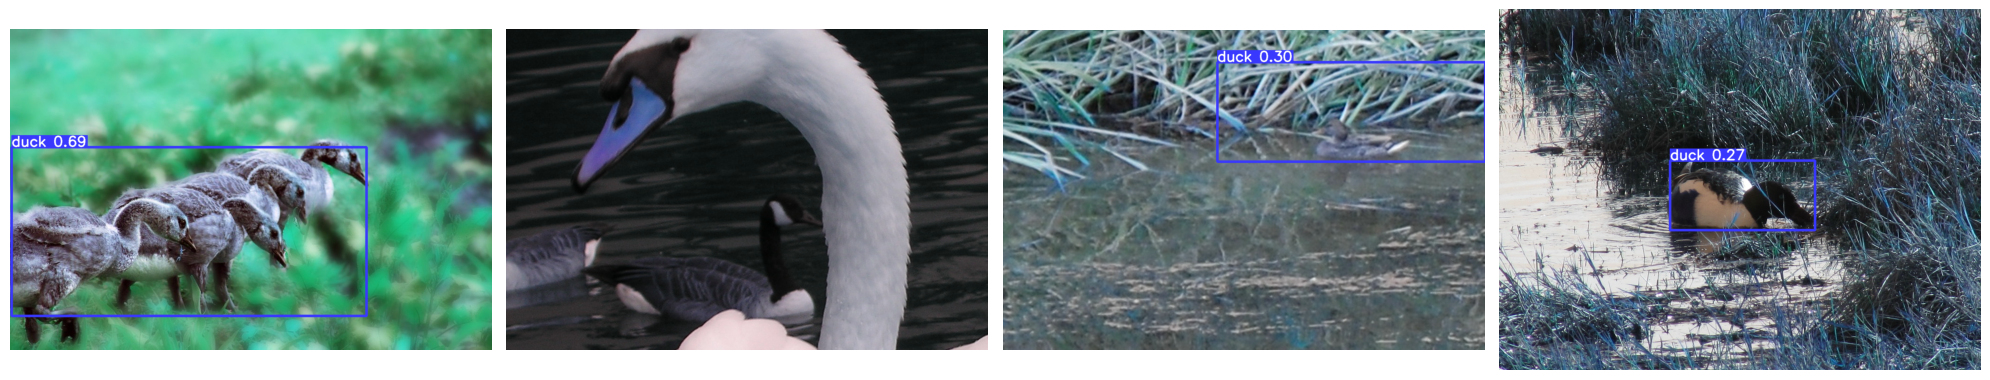

In [3]:
model = YOLO("2/results/yolov8n_pretrained400/weights/best.pt")

val_images_dir = "2/Data/images/val"
val_images = os.listdir(val_images_dir)
selected_val_images = ["0f5e9d02e8b110a5.png", "01fdd867ec430d2b.png", "1edeebd1128c85c6.png", "144cb221958eba04.png"]

image_paths = [os.path.join(val_images_dir, img) for img in selected_val_images]
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i in range(len(image_paths)):
    results = model.predict(image_paths[i])
    composed = results[0].plot()

    axes[i].imshow(composed)
    axes[i].axis('off')  

plt.tight_layout()
plt.show()

### 2.5

#### 2.5.1

With Augmentations

In [35]:
!pip install albumentations==1.0.3 

Defaulting to user installation because normal site-packages is not writeable
  Using cached albumentations-1.0.3-py3-none-any.whl.metadata (31 kB)
Using cached albumentations-1.0.3-py3-none-any.whl (98 kB)
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [29]:
model = YOLO("yolov8n.pt")
results = model.train(data="2/Train1/config.yaml", project="2.5", name="Augmentations", epochs=20, pretrained=True)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=2.5, name=Augmentations, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to 2.5/Augmentations/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to 2.5/Augmentations
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.052      3.107      1.181          9        640: 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.24s/it]

                   all         50         52     0.0034      0.981      0.499      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.9442      2.377      1.112          9        640: 100%|██████████| 7/7 [00:19<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all         50         52     0.0034      0.981      0.611      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.9405      2.214      1.144         11        640: 100%|██████████| 7/7 [00:21<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

                   all         50         52     0.0034      0.981      0.543      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G     0.9895      2.142      1.179          7        640: 100%|██████████| 7/7 [00:22<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all         50         52       0.36      0.746      0.543      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G      1.009      2.122       1.13          6        640: 100%|██████████| 7/7 [00:23<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all         50         52      0.423     0.0385      0.191      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G     0.9721      1.999      1.092         12        640: 100%|██████████| 7/7 [00:22<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]

                   all         50         52    0.00738      0.904      0.135     0.0527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G      1.002      1.963      1.122         12        640: 100%|██████████| 7/7 [00:19<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all         50         52      0.794      0.372      0.571      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/20         0G     0.9267      1.832      1.133          7        640: 100%|██████████| 7/7 [00:18<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all         50         52      0.769      0.385      0.557       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.9672      1.905      1.184         11        640: 100%|██████████| 7/7 [00:19<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]

                   all         50         52      0.457      0.485       0.41      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G     0.9299      1.781      1.074         10        640: 100%|██████████| 7/7 [00:20<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]

                   all         50         52      0.542      0.433      0.402      0.231
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G     0.9182      2.501      1.162          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all         50         52      0.599      0.287      0.351      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.9485      2.522      1.173          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all         50         52       0.55      0.365      0.361      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G     0.8356      2.405      1.066          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all         50         52      0.402      0.481      0.388       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G      1.034      2.345       1.21          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all         50         52      0.383      0.462      0.411      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G     0.9309      2.218       1.11          4        640: 100%|██████████| 7/7 [00:18<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]

                   all         50         52      0.648      0.519      0.549      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      0.984      2.166      1.135          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all         50         52      0.574      0.577      0.571      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G     0.9076      2.234      1.085          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all         50         52      0.666      0.575      0.598      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G     0.8366      1.959      1.078          4        640: 100%|██████████| 7/7 [00:18<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all         50         52      0.724      0.635       0.69      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G     0.8087      1.974      1.038          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all         50         52      0.669      0.737      0.695      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G     0.7941      1.918      1.034          4        640: 100%|██████████| 7/7 [00:18<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.90s/it]

                   all         50         52       0.73      0.673      0.713      0.464



20 epochs completed in 0.137 hours.
Optimizer stripped from 2.5/Augmentations/weights/last.pt, 6.2MB
Optimizer stripped from 2.5/Augmentations/weights/best.pt, 6.2MB

Validating 2.5/Augmentations/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]


                   all         50         52       0.73      0.673      0.713      0.464
Speed: 1.0ms preprocess, 50.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to 2.5/Augmentations


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),▅▇▆▆▂▁▆▆▄▄▄▄▄▄▆▆▇███
metrics/mAP50-95(B),▆█▆▆▂▁▆▆▄▄▃▃▃▃▅▆▆███
metrics/precision(B),▁▁▁▄▅▁██▅▆▆▆▅▄▇▆▇▇▇▇
metrics/recall(B),███▆▁▇▃▄▄▄▃▃▄▄▅▅▅▅▆▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▅▆▇▆▇▅▆▅▄▅▂█▅▆▄▂▁▁


**The default run uses augmentations. They are:**
- **Blur(p=0.01, blur_limit=(3, 7))**. This is Gaussian blur which smoothens an image by averaging the pixel values within a specified kernel size.
- **MedianBlur(p=0.01, blur_limit=(3, 7))**. Median blur replaces each pixel's value with the median value of neighboring pixels within a specified kernel size.
- **ToGray(p=0.01)**. Converts a color image to a grayscale image by mapping the color information to brightness values.
- **CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))**. It enhances the contrast of an image by redistributing pixel intensities based on a local histogram.

**Additional Augmentations**:
- **hsv_h, hsv_s, hsv_v**. Modifies hue, saturation, and value (brightness) to simulate different lighting conditions and variations in colour.
- **translate**. Moves photos vertically and horizontally to reveal parts of objects.
- **scale**. Resizes images using a gain factor to simulate objects at various distances.
- **fliplr**. To accommodate symmetrical objects and improve dataset variety, images are flipped horizontally.
- **mosaic**. Creates a variety of scene compositions and item interactions by combining four images into one.
- **erasing**. Erases portions of the image at random to draw attention to less noticeable details.
- **auto_augment**. Uses one of the predetermined augmentation policies (augmix, autoaugment or randaugment) to achieve optimal categorization.

Without Augmentations

In [33]:
!pip uninstall albumentations==1.0.3 -y

Found existing installation: albumentations 1.0.3
Uninstalling albumentations-1.0.3:
  Successfully uninstalled albumentations-1.0.3


#### 2.5.2

In [34]:
model = YOLO('yolov8n.pt')
results = model.train(data="2/Train1/config.yaml", project="2.5", name="No Augmentations", epochs=20, pretrained = True, close_mosaic=0, hsv_h = 0, hsv_s = 0, hsv_v = 0, translate = 0, scale = 0 , fliplr= 0, mosaic= 0, erasing=0, auto_augment = None)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=2.5, name=No Augmentations, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to 2.5/No Augmentations/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to 2.5/No Augmentations
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.127      3.673      1.285          4        640: 100%|██████████| 7/7 [00:22<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]

                   all         50         52     0.0034      0.981      0.592       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.8415      2.834       1.14          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all         50         52     0.0034      0.981      0.669      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.6922      2.543      1.025          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]

                   all         50         52    0.00333      0.962      0.657      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.5619      2.117     0.9216          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]

                   all         50         52    0.00333      0.962       0.63       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G     0.4969      1.814     0.8897          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all         50         52      0.666      0.536       0.61      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G     0.5649      1.736     0.8935          4        640: 100%|██████████| 7/7 [00:22<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all         50         52      0.661     0.0378      0.542      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.5311      1.575     0.8975          5        640: 100%|██████████| 7/7 [00:18<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]

                   all         50         52    0.00327      0.942      0.353      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/20         0G     0.4555      1.424     0.8571          4        640: 100%|██████████| 7/7 [00:18<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all         50         52      0.833      0.096      0.455      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G      0.445      1.325     0.8625          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]

                   all         50         52      0.632      0.231      0.468      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G     0.4364      1.264     0.8578          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all         50         52      0.732      0.192      0.446      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G     0.3659      1.164     0.8509          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]

                   all         50         52      0.658      0.369      0.419      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/20         0G     0.3654      1.131     0.8434          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all         50         52      0.759      0.404      0.497      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G     0.3468      1.065     0.8351          4        640: 100%|██████████| 7/7 [00:18<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.92s/it]

                   all         50         52      0.665        0.5      0.509      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G     0.3385       1.03     0.8337          4        640: 100%|██████████| 7/7 [00:18<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]

                   all         50         52      0.668      0.462       0.53      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.3159     0.9641     0.8246          5        640: 100%|██████████| 7/7 [00:19<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all         50         52      0.732      0.462      0.548      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G      0.295     0.9427     0.8221          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52      0.682      0.578      0.605      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G     0.2643     0.8841     0.8155          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all         50         52      0.728      0.558      0.607       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.2498      0.785     0.8055          4        640: 100%|██████████| 7/7 [00:18<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all         50         52      0.729      0.519      0.603      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G     0.2437      0.794     0.8084          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]

                   all         50         52      0.763      0.495      0.598      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G     0.2159     0.7649     0.7834          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]

                   all         50         52      0.745      0.506      0.614      0.369

20 epochs completed in 0.133 hours.


Optimizer stripped from 2.5/No Augmentations/weights/last.pt, 6.2MB
Optimizer stripped from 2.5/No Augmentations/weights/best.pt, 6.2MB

Validating 2.5/No Augmentations/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]


                   all         50         52    0.00333      0.962      0.657      0.508
Speed: 1.1ms preprocess, 49.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to 2.5/No Augmentations


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),▆██▇▇▅▁▃▄▃▂▄▄▅▅▇▇▇▆█
metrics/mAP50-95(B),▆██▇▆▅▁▂▂▁▁▃▄▅▅▅▅▅▅█
metrics/precision(B),▁▁▁▁▇▇▁█▆▇▇▇▇▇▇▇▇▇▇▁
metrics/recall(B),████▅▁█▁▂▂▃▄▄▄▄▅▅▅▄█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▄▃▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁


## Results:
### YOLOv8n_augmented: 
- metrics/mAP50(B):	0.71312
- metrics/mAP50-95(B)	0.46373

### YOLOv8n_no_augmented:
- metrics/mAP50(B):	0.65716
- metrics/mAP50-95(B):	0.50836 


In [10]:
yolov8n_augmented = YOLO("2.5/Augmentations/weights/best.pt")
yolov8n_no_augmented = YOLO("2.5/No Augmentations/weights/best.pt")

train_results = []
val_results = []

models = [yolov8n_augmented, yolov8n_no_augmented]

for model in models:
    train = model.val(data="2/Train1/config (copy).yaml", project="2.5")
    val = model.val(data="2/Train1/config.yaml", project="2.5")

    train_results.append(train)
    val_results.append(val)

Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]


                   all        100        102      0.759      0.686      0.779      0.608
Speed: 1.1ms preprocess, 54.5ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to 2.5/val
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


                   all         50         52      0.717      0.732      0.713      0.461
Speed: 1.1ms preprocess, 55.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to 2.5/val2
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


                   all        100        102    0.00333       0.98      0.637      0.514
Speed: 1.0ms preprocess, 49.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to 2.5/val3
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)


val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


                   all         50         52    0.00333      0.962      0.657      0.506
Speed: 1.1ms preprocess, 58.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to 2.5/val4


In [11]:
models = ["YOLOv8n_augmented", "YOLOv8n_no_augmented"]
for i in range(len(models)):
    print(f"Model: {models[i]}")
    print(f"Train mAP: {train_results[i].box.map50}")
    print(f"Validation mAP: {val_results[i].box.map50}\n")

Model: YOLOv8n_augmented
Train mAP: 0.7790065783884141
Validation mAP: 0.7130162486068697

Model: YOLOv8n_no_augmented
Train mAP: 0.6365660461910181
Validation mAP: 0.6570915990644255



There is a significant change in the performance before and after removal of augmentations. Performance decreases after removal of augmentations from 0.71 to 0.65 for validation data. The reasons are as follows:

- Only 100 images were used to train the model, making it a comparatively tiny dataset for object detection. By enhancing the diversity of the data, augmentations help to reduce this problem.
- The lack of augmentations may cause the model to overfit the training set, which would hinder its capacity to generalise to new images.

#### 2.5.3

Removing Mosaic Augmentation

In [12]:
model = YOLO('yolov8n.pt')
results = model.train(data="2/Train1/config.yaml", project="2.5", name="Augmentations_parameters", epochs=20, pretrained = True, close_mosaic=0, mosaic= 0)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=2.5, name=Augmentations_parameters, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: siyaputtagunta (siya26). Use `wandb login --relogin` to force relogin
2024-04-11 21:37:08.453123: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 21:37:08.453171: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 21:37:08.453208: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to 2.5/Augmentations_parameters/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to 2.5/Augmentations_parameters
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.093      3.748      1.279          4        640: 100%|██████████| 7/7 [00:23<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all         50         52     0.0034      0.981      0.559      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.9759      3.019      1.165          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]

                   all         50         52     0.0034      0.981        0.7      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.083      2.991      1.204          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all         50         52     0.0034      0.981      0.654      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      1.042      2.802      1.179          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all         50         52     0.0034      0.981      0.606      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G      0.947      2.644      1.187          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.16s/it]

                   all         50         52      0.483      0.519      0.541      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G      1.041      2.824      1.205          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]

                   all         50         52      0.635      0.538      0.552       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G      1.113      2.722      1.265          5        640: 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all         50         52       0.81      0.328      0.498      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/20         0G      1.048      2.632      1.293          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all         50         52      0.719      0.491      0.514      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G      1.017      2.426      1.152          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]

                   all         50         52      0.418      0.346      0.287      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.124      2.509       1.32          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all         50         52      0.594      0.462      0.399      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G     0.9561      2.477      1.173          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]

                   all         50         52      0.641      0.327      0.397      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/20         0G       1.04      2.413      1.215          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]

                   all         50         52      0.536      0.327      0.361      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G     0.9605      2.317      1.126          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]

                   all         50         52      0.439      0.423      0.402      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G      1.002       2.29      1.187          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all         50         52      0.484      0.558      0.481      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G     0.9903      2.214      1.164          5        640: 100%|██████████| 7/7 [00:20<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all         50         52      0.706      0.416      0.526      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G     0.9125      2.195      1.121          3        640: 100%|██████████| 7/7 [00:20<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]

                   all         50         52      0.628      0.462      0.526      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G     0.8995      2.031       1.08          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all         50         52      0.589      0.538      0.542      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.8215      2.051      1.057          3        640: 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52      0.648      0.577      0.598      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G     0.8486      1.912      1.063          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all         50         52      0.694      0.567      0.628      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G     0.7883      1.877      1.005          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]

                   all         50         52      0.761      0.538      0.625      0.386

20 epochs completed in 0.142 hours.


Optimizer stripped from 2.5/Augmentations_parameters/weights/last.pt, 6.2MB
Optimizer stripped from 2.5/Augmentations_parameters/weights/best.pt, 6.2MB

Validating 2.5/Augmentations_parameters/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.89s/it]


                   all         50         52     0.0034      0.981        0.7      0.498
Speed: 1.0ms preprocess, 56.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to 2.5/Augmentations_parameters


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),▆█▇▆▅▅▅▅▁▃▃▂▃▄▅▅▅▆▇█
metrics/mAP50-95(B),▆█▇▆▅▄▃▄▁▃▃▂▂▂▃▃▄▄▅█
metrics/precision(B),▁▁▁▁▅▆█▇▅▆▇▆▅▅▇▆▆▇▇▁
metrics/recall(B),████▃▃▁▃▁▂▁▁▂▃▂▂▃▄▄█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▅▇▆▄▆█▆▆█▅▆▅▅▅▄▃▂▂▁


Removing HSV Augmentation

In [13]:
model = YOLO('yolov8n.pt')
results = model.train(data="2/Train1/config.yaml", project="2.5", name="Augmentations_parameters", epochs=20, pretrained = True, hsv_h = 0, hsv_s = 0, hsv_v = 0)

New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=2.5, name=Augmentations_parameters2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to 2.5/Augmentations_parameters2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to 2.5/Augmentations_parameters2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G       1.04      3.092      1.181          9        640: 100%|██████████| 7/7 [00:21<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.99s/it]

                   all         50         52     0.0034      0.981      0.526      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.9203      2.371      1.104          9        640: 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]

                   all         50         52     0.0034      0.981      0.626      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.9529       2.19      1.134         11        640: 100%|██████████| 7/7 [00:20<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all         50         52     0.0034      0.981      0.435      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G      0.907      2.167      1.125          7        640: 100%|██████████| 7/7 [00:22<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  2.00s/it]

                   all         50         52      0.104      0.885      0.528      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.9172      2.147      1.103          6        640: 100%|██████████| 7/7 [00:19<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]

                   all         50         52      0.835     0.0972      0.462      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G     0.9135      1.952       1.08         12        640: 100%|██████████| 7/7 [00:21<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]

                   all         50         52      0.626      0.212      0.508      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G     0.9818      1.958      1.122         12        640: 100%|██████████| 7/7 [00:20<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all         50         52      0.752      0.212      0.388      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.8777       1.93      1.072          7        640: 100%|██████████| 7/7 [00:21<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.22s/it]

                   all         50         52      0.496      0.228      0.348      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G     0.9348      1.884      1.129         11        640: 100%|██████████| 7/7 [00:20<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]

                   all         50         52      0.603      0.462      0.491      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G     0.8903      1.691      1.038         10        640: 100%|██████████| 7/7 [00:20<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]

                   all         50         52      0.578      0.442      0.486      0.299
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G     0.9108      2.389      1.157          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52      0.496      0.404      0.461      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      12/20         0G     0.9372      2.519      1.155          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]

                   all         50         52      0.659      0.519      0.573      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G     0.8406      2.408      1.092          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.07s/it]

                   all         50         52       0.57      0.481      0.507      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G     0.9216      2.445      1.151          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]

                   all         50         52      0.476      0.577      0.546      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G     0.8965      2.242      1.121          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52      0.644      0.519      0.587      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.8702      2.207      1.124          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]

                   all         50         52      0.656      0.477      0.525      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      17/20         0G     0.7583       2.13       1.02          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all         50         52      0.607      0.558      0.551      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G     0.8218      2.024      1.072          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.34s/it]

                   all         50         52      0.598      0.538      0.553      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G     0.7923       1.93      1.069          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]

                   all         50         52      0.742      0.519      0.584      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      20/20         0G     0.7915      1.849      1.089          4        640: 100%|██████████| 7/7 [00:19<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]

                   all         50         52      0.787      0.538      0.622      0.431

20 epochs completed in 0.138 hours.


Optimizer stripped from 2.5/Augmentations_parameters2/weights/last.pt, 6.2MB
Optimizer stripped from 2.5/Augmentations_parameters2/weights/best.pt, 6.2MB

Validating 2.5/Augmentations_parameters2/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]


                   all         50         52     0.0034      0.981      0.628      0.482
Speed: 1.0ms preprocess, 52.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to 2.5/Augmentations_parameters2


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),▅█▃▆▄▅▂▁▅▄▄▇▅▆▇▅▆▆▇█
metrics/mAP50-95(B),▅█▃▅▃▄▂▁▃▄▃▅▄▄▅▃▄▄▅█
metrics/precision(B),▁▁▁▂█▆▇▅▆▆▅▇▆▅▆▆▆▆▇▁
metrics/recall(B),███▇▁▂▂▂▄▄▃▄▄▅▄▄▅▄▄█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▆▅▅▅▇▄▅▄▅▅▃▅▄▄▁▃▂▂


Removing Geometric Augmentation

In [14]:
model = YOLO('yolov8n.pt')
results = model.train(data="2/Train1/config.yaml", project="2.5", name="Augmentations_parameters", epochs=20, pretrained = True, translate = 0, scale = 0 , fliplr= 0)

New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=2/Train1/config.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=2.5, name=Augmentations_parameters3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/siya/UGS24/CV/ass3/2/Train1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

Plotting labels to 2.5/Augmentations_parameters3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to 2.5/Augmentations_parameters3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      0.992      3.024      1.224          8        640: 100%|██████████| 7/7 [00:22<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]

                   all         50         52     0.0034      0.981      0.571      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.9087      2.396      1.152          6        640: 100%|██████████| 7/7 [00:21<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  2.00s/it]

                   all         50         52     0.0034      0.981      0.451      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/20         0G     0.7676       1.89      1.043          8        640: 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all         50         52     0.0034      0.981       0.55      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/20         0G     0.7331        1.9      1.035          8        640: 100%|██████████| 7/7 [00:20<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all         50         52      0.362      0.692      0.556      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/20         0G     0.8027      1.795      1.115          7        640: 100%|██████████| 7/7 [00:20<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all         50         52      0.851       0.22      0.601      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/20         0G     0.8239      1.899      1.044          9        640: 100%|██████████| 7/7 [00:20<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]

                   all         50         52      0.805      0.212      0.487      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/20         0G     0.8956       1.82      1.079          8        640: 100%|██████████| 7/7 [00:20<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all         50         52      0.744      0.224      0.434      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.7687      1.647      1.003          8        640: 100%|██████████| 7/7 [00:20<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]

                   all         50         52      0.543      0.154      0.301      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/20         0G     0.8264      1.698      1.071          5        640: 100%|██████████| 7/7 [00:20<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]

                   all         50         52      0.647      0.269      0.407      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/20         0G      0.744      1.626      1.028          8        640: 100%|██████████| 7/7 [00:20<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]

                   all         50         52        0.5       0.25      0.361      0.171
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      11/20         0G     0.7271      1.938      1.071          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]

                   all         50         52      0.711      0.142      0.375      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.6461      1.759      0.985          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]

                   all         50         52      0.599      0.192      0.369      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      13/20         0G     0.5647      1.618     0.9329          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]

                   all         50         52      0.599      0.327      0.446      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      14/20         0G     0.5308      1.447     0.9174          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all         50         52      0.477      0.519      0.536      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      15/20         0G     0.5241      1.342     0.8993          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

                   all         50         52      0.542      0.558      0.557      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      16/20         0G     0.4385      1.254      0.864          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]

                   all         50         52       0.63      0.491      0.567       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.3863        1.2      0.838          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]

                   all         50         52      0.543      0.519      0.535      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      18/20         0G     0.3858      1.136     0.8339          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]

                   all         50         52       0.61      0.596       0.59      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      19/20         0G     0.3456      1.037      0.816          4        640: 100%|██████████| 7/7 [00:21<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]

                   all         50         52      0.639      0.615       0.63      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.3107     0.9597     0.8256          4        640: 100%|██████████| 7/7 [00:20<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]

                   all         50         52      0.574      0.649      0.621      0.445



20 epochs completed in 0.139 hours.
Optimizer stripped from 2.5/Augmentations_parameters3/weights/last.pt, 6.2MB
Optimizer stripped from 2.5/Augmentations_parameters3/weights/best.pt, 6.2MB

Validating 2.5/Augmentations_parameters3/weights/best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.12 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]


                   all         50         52      0.576      0.654      0.621      0.445
Speed: 1.0ms preprocess, 59.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to 2.5/Augmentations_parameters3


lr/pg0,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg1,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
lr/pg2,▁▂▄▅▆▆▇▇█████▇▆▆▅▄▃▂
metrics/mAP50(B),▇▄▆▆▇▅▄▁▃▂▃▂▄▆▆▇▆▇██
metrics/mAP50-95(B),█▅▅▅▇▄▃▁▃▁▂▂▃▆▆▆▆▇██
metrics/precision(B),▁▁▁▄██▇▅▆▅▇▆▆▅▅▆▅▆▆▆
metrics/recall(B),███▆▂▂▂▁▂▂▁▁▃▄▄▄▄▅▅▅
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▅▆▆▇▆▆▅▅▄▄▃▃▂▂▂▁▁


The most important augmentation is:
- **Mosaic Augmentation:** It is very useful for object detection because it can produce a variety of scene compositions and object interactions. 

This is determined by disabling augmentations one by one and checking the corresponding mAP value.